This notebook is using a Linear Regression Model for forecasting advertising revenue. The main goal of this notebook is 1) Explain the concept of Linear Regression 2) Demonstrate how it can be implemented using Python 3) Discuss the practical business implications of advertising revenue forecast.

First we will need to load our data and import all the necessary libraries. Note that the code is implemented in Python 3. 

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels as sm

In [3]:
ad = pd.read_csv('data/ads.csv', index_col = 0)

As a next step, we will run couple of commands to better understand the dataset. 

In [13]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 17.8 KB


In [4]:
ad.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
ad.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


We already know that we are looking for trends in the data. We will run few quick commands to see if we can quickly notice any trends. 

We will start with a basic scaterplot to see if there are any immediate trends. We will use the Seaborn library which we have already imported earlier.

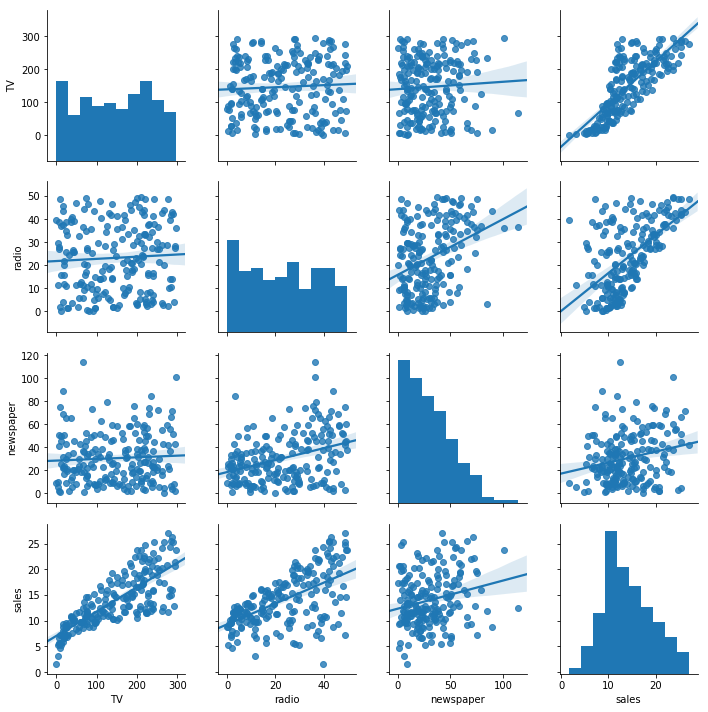

In [9]:
sns.pairplot(ad, kind = 'reg')

We will continue with a correlation matrix.

In [10]:
cor_mat = ad.corr()
cor_mat

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


An other way to visualize any trends is with a heatmap.

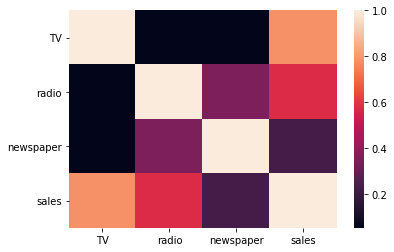

In [11]:
sns.heatmap(cor_mat)

### Simple Linear Regression

Simple regression is used for predicting a quantitative **response Y** on the basis of a single **predictor variable x**. For example, x may represent TV advertising and Y may represent sales. 
$$\text{response} = \text{predictor}\times \text{slope} + \text{intercept}$$
$$\text{y} = \text{b}\times \text{x} + \text{a}$$

The two unknow constants in this model is the predictor and intercept. Together they also known as the model's coefficients or parameters. 

Our goal is to estimate the values of slope and intercept such that the **linear model fits the available data**. In other words, we want to find an intercept and slope such that the resulting line is as lose as possible to n=200 data points (because we know from running the `.describe()` that we have 200 data points). The most common approach for evaluating "closeness" is the **least squares method**.

In the example of the advertising data, we are interested in how the **predictors** of TV, radio, and newspaper are related to sales. 

To start, let's look at a basic plot of the data. 

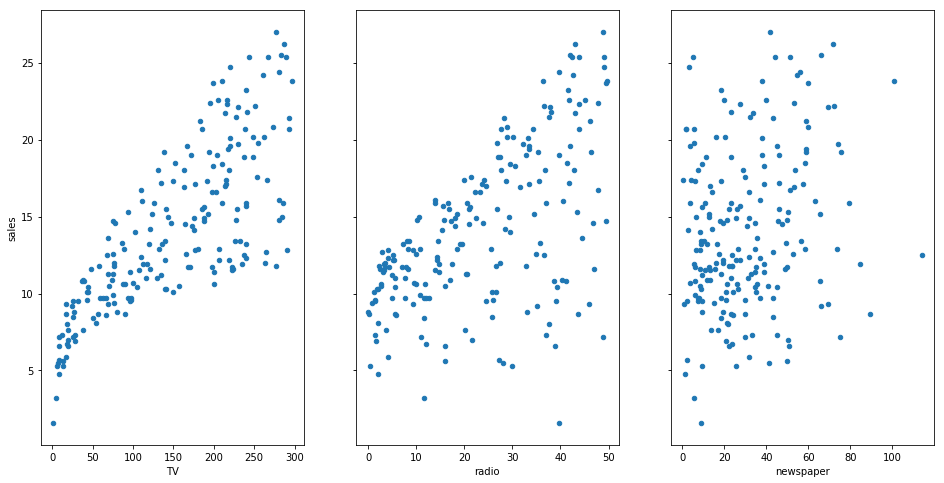

In [38]:
fig, axs = plt.subplots(1, 3, sharey=True)
ad.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
ad.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
ad.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

There are a number of libraries with linear model capabilities.  We will start by looking at the the `.polyfit` and `.polyval` methods in NumPy.

`.polyfit` computes a least squares for a given set of data. Polyfit generates the coefficients of the polynomial, which can be used to model a curve to fit the data. `.polyval` evaluates a polynomial for a given set of x values. So, `.polyval` generates a curve to fit the data based on the coefficients found using polyfit.

As a first example, let's see how `TV` and `sales` are related.





In [39]:
lm_tv = np.polyfit(ad['TV'], ad['sales'], 1)
lm_tv


array([0.04753664, 7.03259355])

Note that the first number is the intercept and the second is the slope. Thus, the equation (with some rounding) is

$$ y = 0.05 + 7.04x$$

With `.polyval()` we can evaluate our model at the values for television and plot a predicted line.

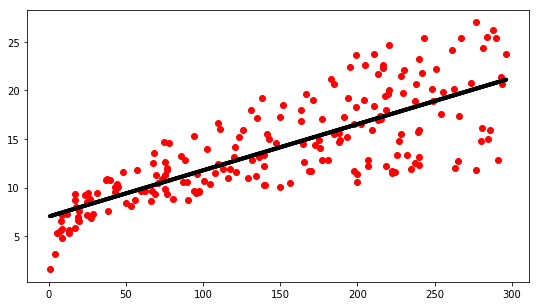

In [40]:
predict_tv = np.polyval(lm, ad['TV'])

#Plot them together

plt.figure(figsize = (9, 5))
plt.scatter(ad['TV'], ad['sales'], color = 'red')
plt.plot(ad['TV'], predict_tv, color = 'black', linewidth = 4)

The distance between the dots and the line represent the error and the fit makes a compromise by averaging their squares. 

Let's repeat the same process for the rest of the variables.

In [70]:
lm_radio = np.polyfit(ad['radio'], ad['sales'], 1)
lm_radio

array([0.20249578, 9.3116381 ])

Thus, the equation (with some rounding) is

$$y=0.2+9.31x$$

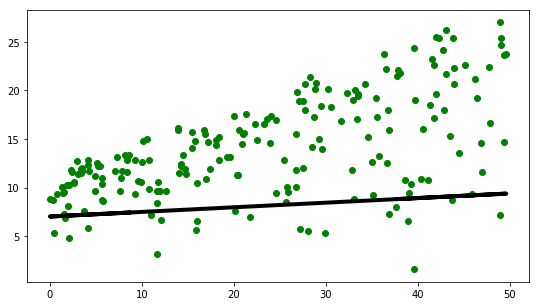

In [71]:
predict_radio = np.polyval(lm, ad['radio'])

#Plot them together

plt.figure(figsize = (9, 5))
plt.scatter(ad['radio'], ad['sales'], color = 'green')
plt.plot(ad['radio'], predict_radio, color = 'black', linewidth = 4)

In [72]:
lm_news = np.polyfit(ad['newspaper'], ad['sales'], 1)
lm_news

array([ 0.0546931 , 12.35140707])

Thus, the equation (with some rounding) is

$$y=0.05+12.35x$$

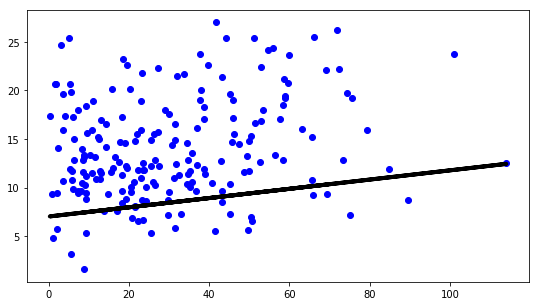

In [73]:
predict_news = np.polyval(lm, ad['newspaper'])

#Plot them together

plt.figure(figsize = (9, 5))
plt.scatter(ad['newspaper'], ad['sales'], color = 'blue')
plt.plot(ad['newspaper'], predict_news, color = 'black', linewidth = 4)

Remember that the idea here is to use this to make a prediction about money spent in Television advertising and its effect on sales.  Say we want to evaluate what will happen if we spend 50,000 in either of the advertising means: 

In [74]:
print ("TV adds would generate $", int(round(np.polyval(lm_tv, 50000))), "in sales")
print ("Radio adds would generate $", int(round(np.polyval(lm_radio, 50000))), "in sales")
print ("Newspaper adds would generate$", int(round(np.polyval(lm_news, 50000))), "in sales")


TV adds would generate $ 2384 in sales
Radio adds would generate $ 10134 in sales
Newspaper adds would generate$ 2747 in sales


### StatsModels

Now, we investigate the `statsmodels` version of linear regression.  Here, he summary information is a little more deliberate than the NumPy version.

In [137]:
lm_tv = smf.ols(formula = 'sales ~ TV', data = ad).fit()
lm_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 01 Apr 2018   Prob (F-statistic):           1.47e-42
Time:                        17:15:06   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
print (lm_tv.f_pvalue)
#print (lm_radio.f_pvalue)
#print (lm_news.f_pvalue)

1.4673897001947095e-42


When we have a small **p-value**, we infer that there is an association between the predictor and the response. Typically the p-values cutoffs are 1 to 5%.

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

In the output below, we can see that the predictor variables of South and North are significant because both of their p-values are 0.000. However, the p-value for East (0.092) is greater than the common alpha level of 0.05, which indicates that it is not statistically significant.

<div class="alert alert-danger" role="alert">
<p>Questions for classroom:</p>
<p>How I get the residual standard error?</p>
</div>

If I want to get the parameters (aka coefficients of the model):

In [114]:
lm_tv.params

Intercept    7.032594
TV           0.047537
dtype: float64

Thus, the equation (with some rounding) is

$$ y = 0.05 + 7.04x$$

In [148]:
#r2 value 

lm_tv.rsquared, 
r = np.sqrt(lm_tv.rsquared)
r

0.7822244248616065

The $r^2$ value tells us the proportion of variance explained.  It comes from the formula:

$$r^2 = \frac{TSS - RSS}{TSS}$$

This is a way for us to understand the predictive capability of our model in terms of the variance.  We would say in this example, that our model describes roughly 78% of the data. The higher the rsquared the better my model.

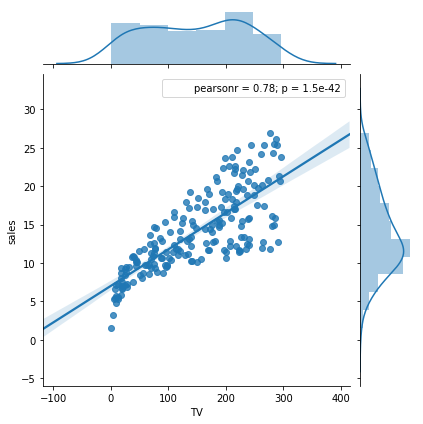

In [162]:
sns.jointplot('TV', 'sales', data = ad, kind = 'reg')

### Residuals 

We want to quantify the extend to which the model fits the data. The quality of a linera regression model is usually assessed using two related quantities. The **Residual Standard Error (RSE)** and **the r-squared statistic**.

In [144]:
np.sqrt(0.612)

0.7823042886243179

In [126]:
lm_tv.bse

Intercept    0.457843
TV           0.002691
dtype: float64

**The following assumptions are made about residuals in the OLS method.**

How far away from the model these points are? It gives us an idea of the performance of the model. 

<div class="alert alert-danger" role="alert">
<ul>
<li> Should be balanced and symmetric about 0</li>
    <li> Should be free of trends </li>
<li> Absolute value or overall magnitude of residuals should be roughly the same for entire dataset.  The assumption that magnitude of variance is constant is "homoscedasticity". The shouldn't "funnel out" as you move to the right of the axis. If they do, might something be wrong with the data. Or they indicate sub-sections within the data if the residuals close to each other are tight together. (like below)</li>
    <li> Residuals distributed according to a Gaussian/aka normal distribution </li>
    </ul>
</div>

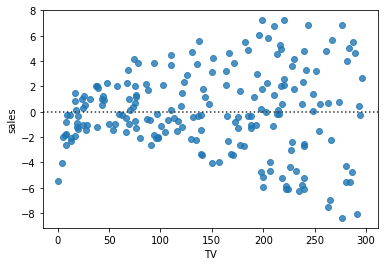

In [83]:
sns.residplot('TV', 'sales', data = ad)

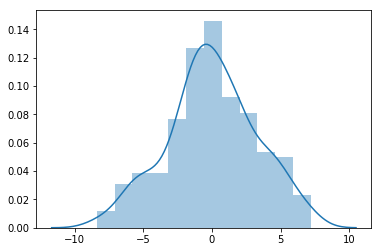

In [85]:
sns.distplot(lm_tv.resid)

In [88]:
resids = pd.DataFrame({'residuals': lm_tv.resid})
resids.skew()

residuals   -0.089303
dtype: float64

In [89]:
resids.kurt()

residuals   -0.196
dtype: float64

**PROBLEM**

Compare the performance of pairs of indicators (TV and Radio, TV and Newspaper, and Radio and Newspaper) to the model using all three.  What do you think this means?

In [155]:
X = np.column_stack((ad.TV, ad.radio, ad.newspaper))
res = smf.ols(formula = 'sales ~ X', data = ad).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 01 Apr 2018   Prob (F-statistic):           1.58e-96
Time:                        20:32:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
X[0]           0.0458      0.001     32.809      0.000       0.043       0.049
X[1]           0.1885      0.009     21.893      0.000       0.172       0.206
X[2]          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""